https://www.youtube.com/watch?v=fCMrO_VzeL8&list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y&index=16

# 16. How do I handle missing values in pandas?

In [2]:
import pandas as pd

In [3]:
# read a dataset of UFO reports into a DataFrame
ufo = pd.read_csv('http://bit.ly/uforeports')

In [3]:
ufo.tail() #missing data = NaN

,City,Colors Reported,Shape Reported,State,Time
18236,Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
18238,Eagle River,NaN,NaN,WI,12/31/2000 23:45
18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45
18240,Ybor,NaN,OVAL,FL,12/31/2000 23:59


**What does "NaN" mean?

"NaN" is not a string, rather it's a special value: **numpy.nan.**
It stands for "Not a Number" and indicates a **missing value.**
read_csv detects missing values (by default) when reading the file, and replaces them with this special value.

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

In [4]:
# 'isnull' returns a DataFrame of booleans (True if missing, False if not missing)
ufo.isnull().tail() #True for missing data

,City,Colors Reported,Shape Reported,State,Time
18236,False,True,False,False,False
18237,False,True,False,False,False
18238,False,True,True,False,False
18239,False,False,False,False,False
18240,False,True,False,False,False


In [5]:
# 'nonnull' returns the opposite of 'isnull' (True if not missing, False if missing)
ufo.notnull().tail() #False for missing data

,City,Colors Reported,Shape Reported,State,Time
18236,True,False,True,True,True
18237,True,False,True,True,True
18238,True,False,False,True,True
18239,True,True,True,True,True
18240,True,False,True,True,True


# numbers of missing values in which of the columns

In [7]:
# count the number of missing values in each Series
ufo.isnull().sum()

City                  25
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

This calculation works because:

1.The **sum** method for a DataFrame operates on **axis=0** by default (and thus produces column sums).

2.In order to add boolean values, pandas converts **True to 1 and False to 0**.

In [6]:
pd.Series([True,False,True]).sum() # considering the bool as binary standart 0==False and 1==True

2

# Filter to see the '25 rows' missing values = checking only the NaN

In [9]:
# use the 'isnull' Series method to filter the DataFrame rows
ufo[ufo.City.isnull()].head()

,City,Colors Reported,Shape Reported,State,Time
21,NaN,NaN,NaN,LA,8/15/1943 0:00
22,NaN,NaN,LIGHT,LA,8/15/1943 0:00
204,NaN,NaN,DISK,CA,7/15/1952 12:30
241,NaN,BLUE,DISK,MT,7/4/1953 14:00
613,NaN,NaN,DISK,NV,7/1/1960 12:00


How to handle missing values depends on the dataset as well as the nature of your analysis. Here are some options:


In [10]:
# examine the number of rows and columns
ufo.shape

(18241, 5)

# Droping missing values

In [11]:
# if 'any' values are missing in a row, then drop that row
ufo.dropna(how='any').shape #what it left if we retrieve all NaN data

(2486, 5)

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html

In [12]:
# if 'all' values are missing in a row, then drop that row (none are dropped in this case)
ufo.dropna(how='all').shape

(18241, 5)

In [13]:
# if 'any' values are missing in a row (considering only 'City' and 'Shape Reported'), then drop that row
ufo.dropna(subset=['City','Shape Reported'], how='any').shape # looking only for missing rows in City and Shape...

(15576, 5)

In [14]:
# if 'all' values are missing in a row (considering only 'City' and 'Shape Reported'), then drop that row
ufo.dropna(subset=['City','Shape Reported'], how='all').shape # only 4 rows are missing to City and Shape Reported

(18237, 5)

In [16]:
# 'value_counts' does not include missing values by default
ufo['Shape Reported'].value_counts(dropna=False).head()

LIGHT       2803
NaN         2644
DISK        2122
TRIANGLE    1889
OTHER       1402
Name: Shape Reported, dtype: int64

# Put NAN with VARIOUS

In [15]:
ufo['Shape Reported'].fillna(value='VARIOUS', inplace=True)

In [18]:
# explicitly include missing values
ufo['Shape Reported'].value_counts(dropna=False).head() #Vairous(2644) + NaN(333)

LIGHT       2803
NaN         2644
DISK        2122
TRIANGLE    1889
OTHER       1402
Name: Shape Reported, dtype: int64

In [19]:
# fill in missing values with a specified value
ufo['Shape Reported'].fillna(value='VARIOUS', inplace=True)

In [20]:
# confirm that the missing values were filled in
ufo['Shape Reported'].value_counts().head()

VARIOUS     2977
LIGHT       2803
DISK        2122
TRIANGLE    1889
OTHER       1402
Name: Shape Reported, dtype: int64

In [17]:
%matplotlib inline

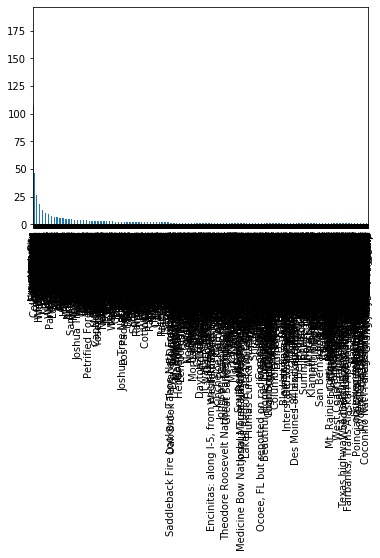

In [20]:
ufo.City.value_counts().plot(kind = '')

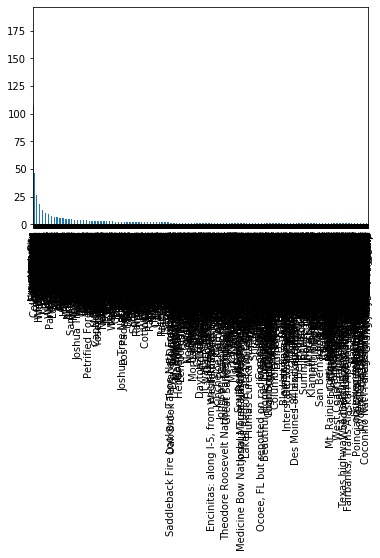

In [22]:
ufo.City.value_counts().plot(kind = 'bar')